## Sentiment analysis

In [1]:
from helpers import *
import pandas as pd
import matplotlib.pyplot as plt
import json
import networkx as nx
import random
import plotly.graph_objects as go


In [13]:
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import matplotlib.pyplot as plt
%matplotlib inline  

seed = 42
random.seed(seed)
np.random.seed(seed)

#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [7]:
predictions_gpt_df = pd.read_csv('movies_gpt2_prediction.csv')
predictions_gpt_df.drop(columns=predictions_gpt_df.columns[0], axis=1, inplace=True)
predictions_gpt_df = predictions_gpt_df.rename(columns={'feminism':"prediction_gpt"})

predictions_SVM_df = pd.read_csv('movies_svm_predictions.csv')
predictions_SVM_df.drop(columns=predictions_SVM_df.columns[0], axis=1, inplace=True)
predictions_SVM_df = predictions_SVM_df.rename(columns={'Feminism prediction':"prediction_svm"})

predictions_gpt_df2 = pd.read_csv('movie_feminism_dataset_gpt2_prediction.csv')
predictions_gpt_df2.drop(columns=predictions_gpt_df2.columns[0], axis=1, inplace=True)
predictions_gpt_df2 = predictions_gpt_df2.rename(columns={'feminism':"prediction_gpt2"})

In [11]:
feminist_movie_plots = predictions_gpt_df2[predictions_gpt_df2['prediction_gpt2']==1]
feminist_movie_plots = feminist_movie_plots['Summaries']
non_feminist_movie_plots = predictions_gpt_df2[predictions_gpt_df2['prediction_gpt2']==0]
non_feminist_movie_plots = non_feminist_movie_plots['Summaries']

In [12]:
non_feminist_movie_plots

2        Poovalli Induchoodan  is sentenced for six yea...
5        The president is on his way to give a speech. ...
9        A line of people  drool at the window of the s...
10       Lola  attempts to gain her father's trust fund...
11       Milan and Goran are two criminals who smuggle ...
                               ...                        
42292    While drinking alone one night and reminiscing...
42294    A high school prom in Georgia is unexpectedly ...
42299    In 1928 Hollywood, director Leo Andreyev  look...
42301    Abdur Rehman Khan , a middle-aged dry fruit se...
42302    1940 - Operation Dynamo has just taken place. ...
Name: Summaries, Length: 20987, dtype: object

In [14]:
nlp = spacy.load('en_core_web_sm')

In [16]:
feminist_docs = []
for summary in feminist_movie_plots :
    doc = nlp(summary)
    feminist_docs.append(doc)

In [22]:
for sent in feminist_docs[1].sents:
    print(sent)

The nation of Panem consists of a wealthy Capitol and twelve poorer districts.
As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games.
The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth.
In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12.
Her older sister Katniss volunteers to take her place.
Peeta Mellark, a baker's son who once gave Katniss bread when she was starving, is the other District 12 tribute.
Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy.
He warns them about the "Career" tributes who train intensively at special academies and almost always win.
During a TV interview with Caesar Flickerman, Peeta unexpectedly reveals his love for Katniss.
She is outraged, believing it to be a ploy to gain audience support, as "sponsors" may

In [24]:
analyzer = SentimentIntensityAnalyzer()

TypeError: can only concatenate str (not "spacy.tokens.span.Span") to str

In [30]:
vs_array = []
for sent in feminist_docs[1].sents:
    print(sent)
    vs = analyzer.polarity_scores(sent.text)
    vs_array.append(vs)

The nation of Panem consists of a wealthy Capitol and twelve poorer districts.
As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games.
The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth.
In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12.
Her older sister Katniss volunteers to take her place.
Peeta Mellark, a baker's son who once gave Katniss bread when she was starving, is the other District 12 tribute.
Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy.
He warns them about the "Career" tributes who train intensively at special academies and almost always win.
During a TV interview with Caesar Flickerman, Peeta unexpectedly reveals his love for Katniss.
She is outraged, believing it to be a ploy to gain audience support, as "sponsors" may

In [32]:
vs_array = []
for plot in feminist_docs:
    for sent in plot.sents:
        vs = analyzer.polarity_scores(sent.text)
        vs_array.append(vs)

In [33]:
vs_array

[{'neg': 0.083, 'neu': 0.832, 'pos': 0.084, 'compound': 0.0083},
 {'neg': 0.156, 'neu': 0.688, 'pos': 0.156, 'compound': 0.0},
 {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.6908},
 {'neg': 0.208, 'neu': 0.415, 'pos': 0.377, 'compound': 0.6486},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.4215},
 {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.34},
 {'neg': 0.065, 'neu': 0.647, 'pos': 0.288, 'compound': 0.7024},
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369},
 {'neg': 0.114, 'neu': 0.686, 'pos': 0.199, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'compound': -0.8696},
 {'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'compound': -0.3818},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'compound': -0.7096},
 {'neg': 

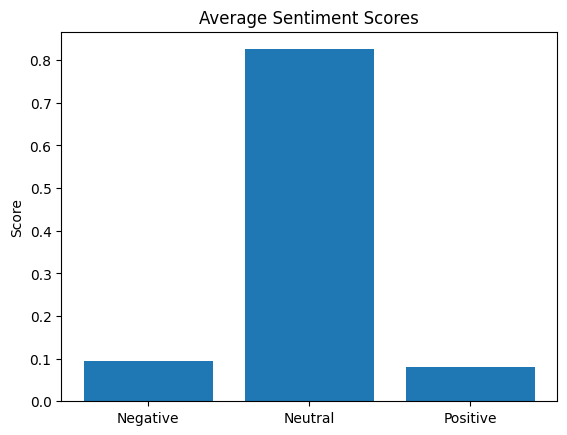

In [35]:
import matplotlib.pyplot as plt
import numpy as np

avg_neg = np.mean([s['neg'] for s in vs_array])
avg_neu = np.mean([s['neu'] for s in vs_array])
avg_pos = np.mean([s['pos'] for s in vs_array])

# Plotting
categories = ['Negative', 'Neutral', 'Positive']
averages = [avg_neg, avg_neu, avg_pos]

plt.bar(categories, averages)
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
plt.show()

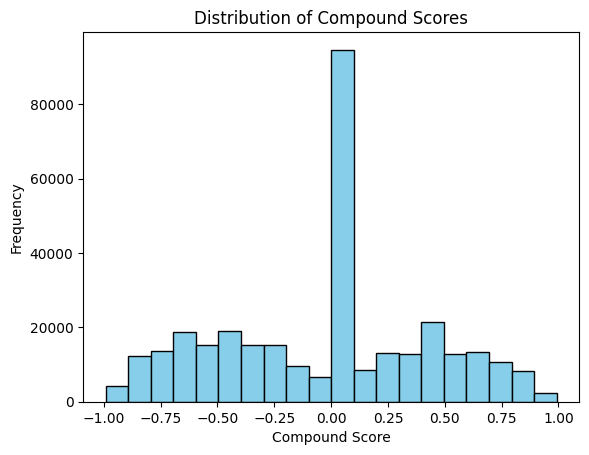

In [36]:
#The overall sentiment score (aggregated sentiment).
#The compound score is the most important and is computed as a normalized value between -1 (most negative) and +1 (most positive).
# It summarizes the sentiment of the text:
#   Compound score > 0.05: Positive sentiment
#   Compound score < -0.05: Negative sentiment
#   Compound score between -0.05 and 0.05: Neutral sentiment

compound_scores = [s['compound'] for s in vs_array]

plt.hist(compound_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


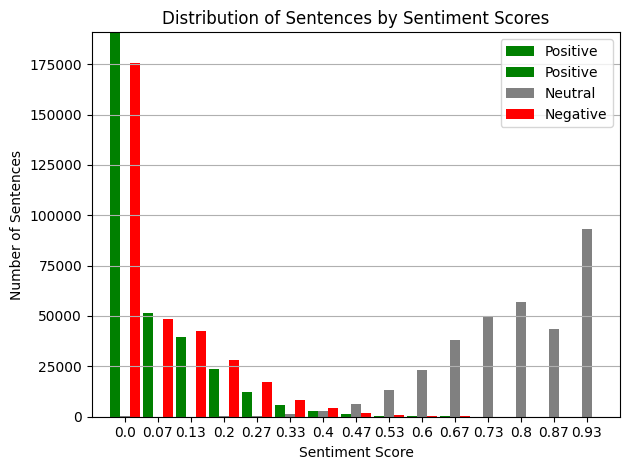

In [42]:
positive_sent = []
negative_sent = []
neutral_sent = []
#iterate through the sentences, get polarity scores, choose a value
[positive_sent.append(analyzer.polarity_scores(sent.text)['pos']) for sent in doc.sents]
for sent in vs_array:
    positive_sent.append(sent['pos'])
    negative_sent.append(sent['neg'])
    neutral_sent.append(sent['neu'])

bins = np.linspace(0, 1, 16)
pos_hist, _ = np.histogram(positive_sent, bins=bins)
neu_hist, _ = np.histogram(negative_sent, bins=bins)
neg_hist, _ = np.histogram(neutral_sent, bins=bins)

# Define the x-axis positions for each group of bars
bar_width = 0.3
x = np.arange(len(bins) - 1)  # Number of bins

# Create the grouped bar chart
plt.bar(x - bar_width, pos_hist, width=bar_width, label='Positive', color='green', align='center')
plt.bar(x, neg_hist, width=bar_width, label='Neutral', color='gray', align='center')
plt.bar(x + bar_width, neu_hist, width=bar_width, label='Negative', color='red', align='center')

# Customize the plot
plt.xticks(x, [f"{round(b, 2)}" for b in bins[:-1]])  # Label x-axis with bin ranges
plt.xlim([-1, len(bins) - 1])  # Adjust x-axis limits
plt.ylim([0, max(max(pos_hist), max(neg_hist), max(neu_hist)) + 500])  # Adjust y-axis limits
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentences by Sentiment Scores')
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

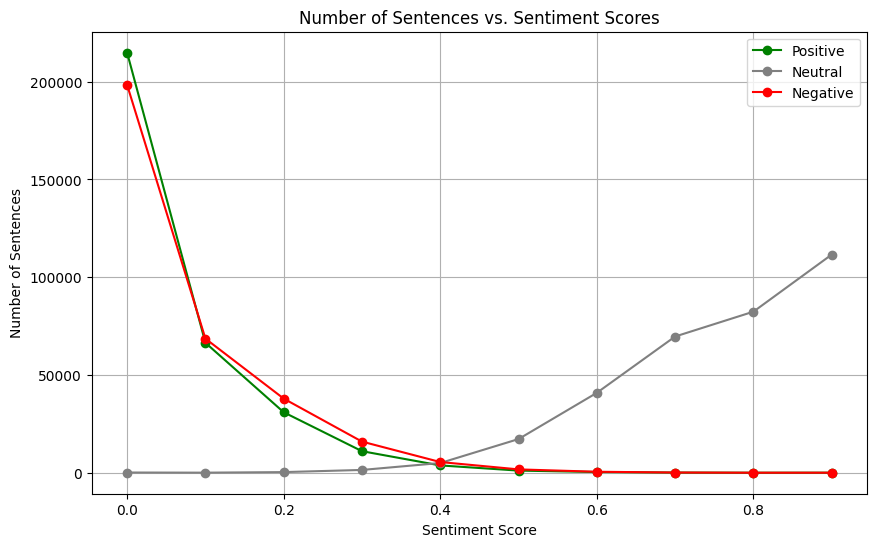

In [40]:
# Extract scores for each sentiment
pos_scores = [s['pos'] for s in vs_array]
neu_scores = [s['neu'] for s in vs_array]
neg_scores = [s['neg'] for s in vs_array]

# Define bins (e.g., 0 to 1 in steps of 0.1)
bins = np.linspace(0, 1, 11)

# Compute histograms for each sentiment
pos_counts, _ = np.histogram(pos_scores, bins=bins)
neu_counts, _ = np.histogram(neu_scores, bins=bins)
neg_counts, _ = np.histogram(neg_scores, bins=bins)

# Plot histograms
plt.figure(figsize=(10, 6))

# Plot for positive scores
plt.plot(bins[:-1], pos_counts, label='Positive', marker='o', linestyle='-', color='green')

# Plot for neutral scores
plt.plot(bins[:-1], neu_counts, label='Neutral', marker='o', linestyle='-', color='gray')

# Plot for negative scores
plt.plot(bins[:-1], neg_counts, label='Negative', marker='o', linestyle='-', color='red')

# Add labels, legend, and title
plt.title('Number of Sentences vs. Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Sentences')
plt.legend()
plt.grid(True)

plt.show()


### Analyse the sentiments in non-feminist movies

In [43]:
non_feminist_docs = []
for summary in non_feminist_movie_plots :
    doc = nlp(summary)
    non_feminist_docs.append(doc)

In [44]:
vs_array_non_fem = []
for plot in non_feminist_docs:
    for sent in plot.sents:
        vs = analyzer.polarity_scores(sent.text)
        vs_array_non_fem.append(vs)

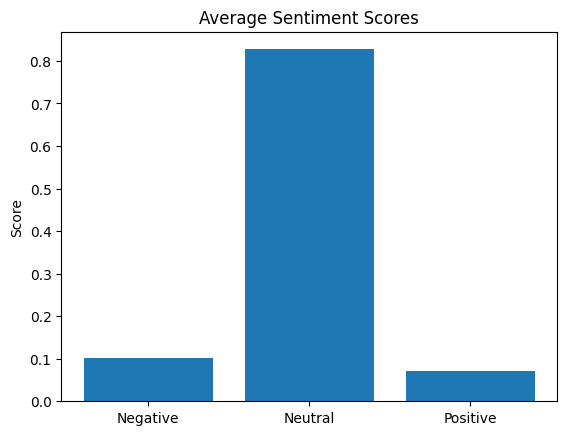

In [45]:
avg_neg = np.mean([s['neg'] for s in vs_array_non_fem])
avg_neu = np.mean([s['neu'] for s in vs_array_non_fem])
avg_pos = np.mean([s['pos'] for s in vs_array_non_fem])

# Plotting
categories = ['Negative', 'Neutral', 'Positive']
averages = [avg_neg, avg_neu, avg_pos]

plt.bar(categories, averages)
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
plt.show()

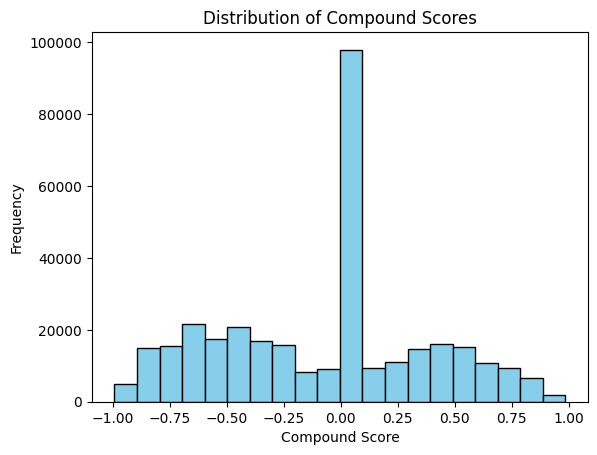

In [46]:
compound_scores = [s['compound'] for s in vs_array_non_fem]

plt.hist(compound_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

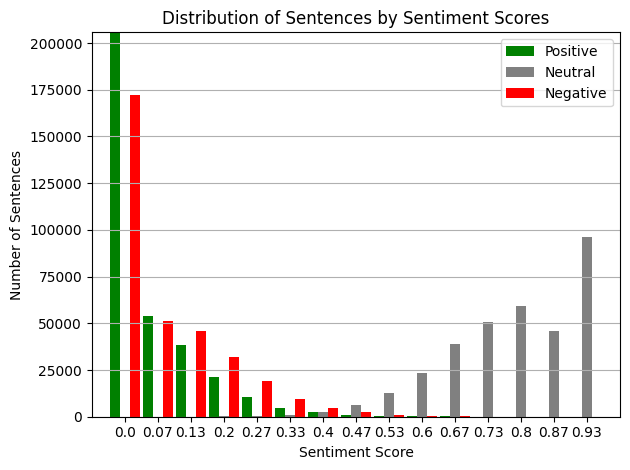

In [47]:
positive_sent = []
negative_sent = []
neutral_sent = []
#iterate through the sentences, get polarity scores, choose a value
[positive_sent.append(analyzer.polarity_scores(sent.text)['pos']) for sent in doc.sents]
for sent in vs_array_non_fem:
    positive_sent.append(sent['pos'])
    negative_sent.append(sent['neg'])
    neutral_sent.append(sent['neu'])

bins = np.linspace(0, 1, 16)
pos_hist, _ = np.histogram(positive_sent, bins=bins)
neu_hist, _ = np.histogram(negative_sent, bins=bins)
neg_hist, _ = np.histogram(neutral_sent, bins=bins)

# Define the x-axis positions for each group of bars
bar_width = 0.3
x = np.arange(len(bins) - 1)  # Number of bins

# Create the grouped bar chart
plt.bar(x - bar_width, pos_hist, width=bar_width, label='Positive', color='green', align='center')
plt.bar(x, neg_hist, width=bar_width, label='Neutral', color='gray', align='center')
plt.bar(x + bar_width, neu_hist, width=bar_width, label='Negative', color='red', align='center')

# Customize the plot
plt.xticks(x, [f"{round(b, 2)}" for b in bins[:-1]])  # Label x-axis with bin ranges
plt.xlim([-1, len(bins) - 1])  # Adjust x-axis limits
plt.ylim([0, max(max(pos_hist), max(neg_hist), max(neu_hist)) + 500])  # Adjust y-axis limits
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentences by Sentiment Scores')
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

## Compare feminist and non-feminist movie sentiments

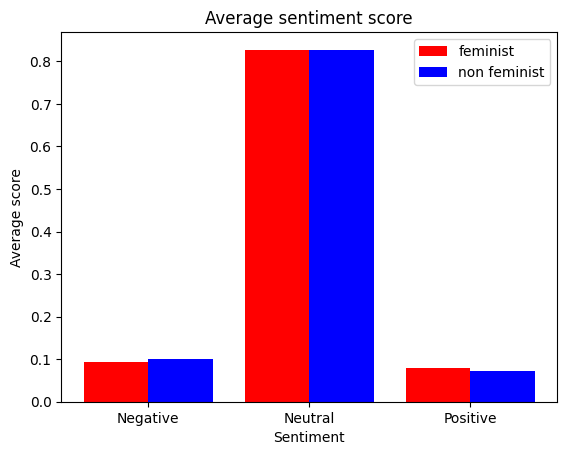

In [49]:
avg_neg_feminist = np.mean([s['neg'] for s in vs_array])
avg_neu_feminist = np.mean([s['neu'] for s in vs_array])
avg_pos_feminist = np.mean([s['pos'] for s in vs_array])

avg_neg_non_feminist = np.mean([s['neg'] for s in vs_array_non_fem])
avg_neu_non_feminist = np.mean([s['neu'] for s in vs_array_non_fem])
avg_pos_non_feminist = np.mean([s['pos'] for s in vs_array_non_fem])

averages_feminist = [avg_neg_feminist, avg_neu_feminist, avg_pos_feminist]
averages_non_feminist = [avg_neg_non_feminist,avg_neu_non_feminist,avg_pos_non_feminist]

X_axis = np.arange(3) 
  
plt.bar(X_axis - 0.2, averages_feminist, 0.4, label = 'feminist', color = 'r') 
plt.bar(X_axis + 0.2, averages_non_feminist, 0.4, label = 'non feminist', color = 'b') 

# Plotting
categories = ['Negative', 'Neutral', 'Positive']

plt.xticks(X_axis, categories) 
plt.xlabel("Sentiment") 
plt.ylabel("Average score") 
plt.title("Average sentiment score") 
plt.legend() 
plt.show() 

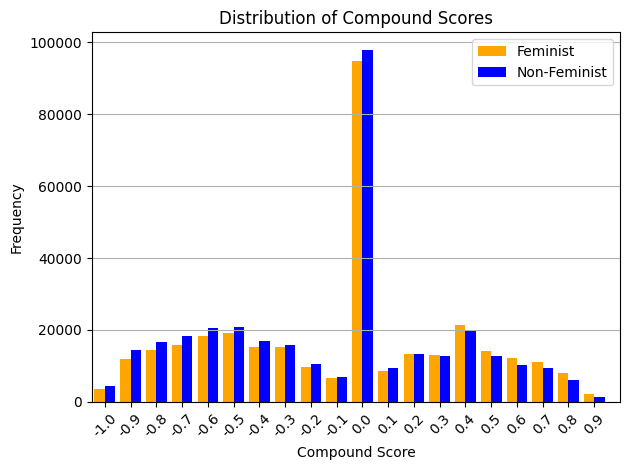

In [54]:
compound_scores_feminist = [s['compound'] for s in vs_array]
compound_scores_non_feminist = [s['compound'] for s in vs_array_non_fem]

# Assuming compound_scores_feminist and compound_scores_non_feminist are already populated
bins = np.linspace(-1, 1, 21)  # Compound scores range from -1 to 1

# Calculate histogram counts for each category
feminist_hist, _ = np.histogram(compound_scores_feminist, bins=bins)
non_feminist_hist, _ = np.histogram(compound_scores_non_feminist, bins=bins)

# Define the x-axis positions for each group of bars
bar_width = 0.4
x = np.arange(len(bins) - 1)  # Number of bins

# Create the grouped bar chart
plt.bar(x - bar_width / 2, feminist_hist, width=bar_width, label='Feminist', color='orange', align='center')
plt.bar(x + bar_width / 2, non_feminist_hist, width=bar_width, label='Non-Feminist', color='blue', align='center')

# Customize the plot
plt.xticks(x, [f"{round(b, 2)}" for b in bins[:-1]], rotation=45)  # Label x-axis with bin ranges
plt.xlim(-0.5, len(bins) - 1)  # Adjust x-axis limits to fit all bars
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


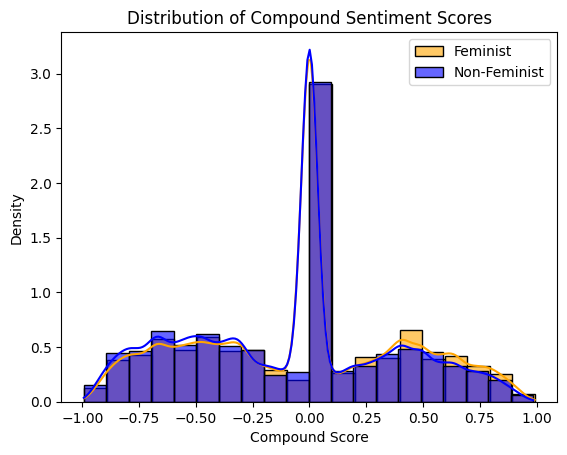

In [60]:
import seaborn as sns

# Plot histograms
sns.histplot(compound_scores_feminist, bins=20, kde=True, color='orange', label='Feminist', stat='density', alpha=0.6)
sns.histplot(compound_scores_non_feminist, bins=20, kde=True, color='blue', label='Non-Feminist', stat='density', alpha=0.6)

# Customize the plot
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()

/var/folders/v0/fsjhyw8s4q981gycqjlwxknm0000gn/T/ipykernel_8284/2985788816.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Feminist', 'Non-Feminist'], patch_artist=True, notch=True,


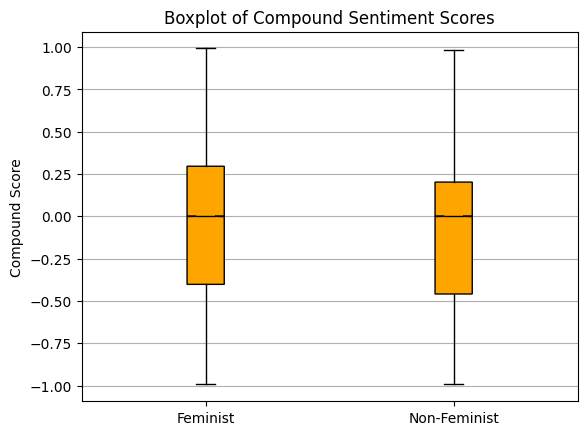

In [56]:
# Combine data for boxplot
data = [
    compound_scores_feminist,
    compound_scores_non_feminist
]

# Create box plots
plt.boxplot(data, labels=['Feminist', 'Non-Feminist'], patch_artist=True, notch=True, 
            boxprops=dict(facecolor='orange', color='black'),
            medianprops=dict(color='black'))
plt.title('Boxplot of Compound Sentiment Scores')
plt.ylabel('Compound Score')
plt.grid(axis='y')
plt.show()


In [58]:
from scipy.stats import ttest_ind

# Perform t-tests for compound scores
t_stat, p_val = ttest_ind(compound_scores_feminist, compound_scores_non_feminist, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Significant difference in compound scores between feminist and non-feminist movies.")
else:
    print("No significant difference in compound scores between feminist and non-feminist movies.")


T-statistic: 38.85903567527242, P-value: 0.0
Significant difference in compound scores between feminist and non-feminist movies.


In [62]:
import numpy as np

# Calculate means and standard deviations
mean_fem = np.mean(compound_scores_feminist)
mean_non_fem = np.mean(compound_scores_non_feminist)
std_fem = np.std(compound_scores_feminist, ddof=1)
std_non_fem = np.std(compound_scores_non_feminist, ddof=1)

# Calculate pooled standard deviation
pooled_std = np.sqrt(((len(compound_scores_feminist) - 1) * std_fem**2 + 
                      (len(compound_scores_non_feminist) - 1) * std_non_fem**2) /
                     (len(compound_scores_feminist) + len(compound_scores_non_feminist) - 2))

# Calculate Cohen's d
cohens_d = (mean_fem - mean_non_fem) / pooled_std
print(f"Cohen's d: {cohens_d}")


Cohen's d: 0.09518838768161847
